In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Import Data
data = pd.read_csv("training.csv")
# Look at format
data.head()

,article_number,article_words,topic
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",FOREX MARKETS
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",MONEY MARKETS
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",SPORTS
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",FOREX MARKETS
4,5,"morn,complet,weekend,minut,minut,minut,arrow,d...",IRRELEVANT


In [5]:
# Code Topics into Numbers
topic_codes = {
    'ARTS CULTURE ENTERTAINMENT': 0,
    'BIOGRAPHIES PERSONALITIES PEOPLE': 1,
    'DEFENCE': 2,
    'DOMESTIC MARKETS': 3,
    'FOREX MARKETS': 4,
    'HEALTH': 5,
    'MONEY MARKETS': 6,
    'SCIENCE AND TECHNOLOGY': 7,
    'SHARE LISTINGS': 8,
    'SPORTS': 9,
    'IRRELEVANT': 10
}

# Topic mapping
data['topic_code'] = data['topic']
data = data.replace({'topic_code':topic_codes})

# Look at new column of Topic Codes
data.head()

,article_number,article_words,topic,topic_code
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",FOREX MARKETS,4
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",MONEY MARKETS,6
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",SPORTS,9
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",FOREX MARKETS,4
4,5,"morn,complet,weekend,minut,minut,minut,arrow,d...",IRRELEVANT,10


# Look at distribution of Topics in Training Set

## 1. All Data

In [6]:
# Count
print(data["topic"].value_counts(normalize=True,dropna=False, sort=False))

# Relative frequency
print(data["topic"].value_counts(normalize=True,dropna=False,sort=False))

HEALTH                              0.019263
SHARE LISTINGS                      0.022947
DEFENCE                             0.027158
SPORTS                              0.116000
DOMESTIC MARKETS                    0.014000
MONEY MARKETS                       0.176105
FOREX MARKETS                       0.088947
SCIENCE AND TECHNOLOGY              0.007368
IRRELEVANT                          0.498316
BIOGRAPHIES PERSONALITIES PEOPLE    0.017579
ARTS CULTURE ENTERTAINMENT          0.012316
Name: topic, dtype: float64
HEALTH                              0.019263
SHARE LISTINGS                      0.022947
DEFENCE                             0.027158
SPORTS                              0.116000
DOMESTIC MARKETS                    0.014000
MONEY MARKETS                       0.176105
FOREX MARKETS                       0.088947
SCIENCE AND TECHNOLOGY              0.007368
IRRELEVANT                          0.498316
BIOGRAPHIES PERSONALITIES PEOPLE    0.017579
ARTS CULTURE ENTERTAINMENT 

Text(0,0.5,'Count')

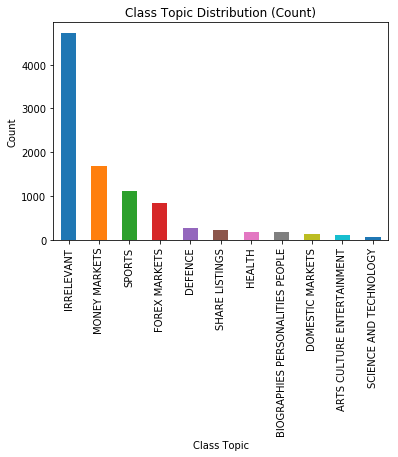

In [7]:
# Histogram of Topic Count Distribution
ax = data["topic"].value_counts(normalize=False,dropna=False, sort=True).plot(kind='bar', title="Class Topic Distribution (Count)")
ax.set_xlabel("Class Topic")
ax.set_ylabel("Count")

Text(0,0.5,'Relative Frequency')

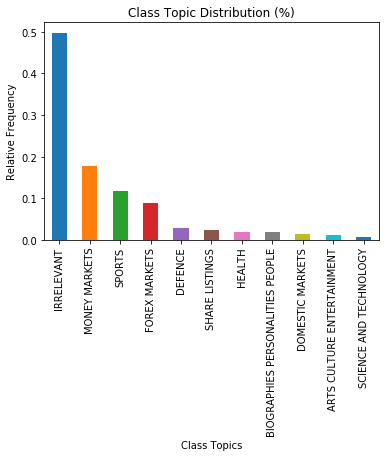

In [8]:
# Histogram of Relative Frequence per Topic
ax = data["topic"].value_counts(normalize=True,dropna=False,sort=True).plot(kind='bar', title="Class Topic Distribution (%)")
ax.set_xlabel("Class Topics")
ax.set_ylabel("Relative Frequency")

## 2. ONLY Relevant Articles

In [9]:
# Make a copy of Data
rel_data = data.copy()

# See that format is correct
rel_data.head()

,article_number,article_words,topic,topic_code
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",FOREX MARKETS,4
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",MONEY MARKETS,6
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",SPORTS,9
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",FOREX MARKETS,4
4,5,"morn,complet,weekend,minut,minut,minut,arrow,d...",IRRELEVANT,10


In [10]:
# Only take Relevant Topics (exclude IRRELEVANT)
rel_topics = rel_data['topic_code'] != 10

# Check format doesn't contain IRRELEVANT
rel_data = rel_data[rel_topics]
rel_data.reset_index(drop=True, inplace=True)
rel_data.head()

,article_number,article_words,topic,topic_code
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",FOREX MARKETS,4
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",MONEY MARKETS,6
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",SPORTS,9
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",FOREX MARKETS,4
4,6,"regist,equal,stock,stock,city,city,period,issu...",SHARE LISTINGS,8


Text(0,0.5,'Count')

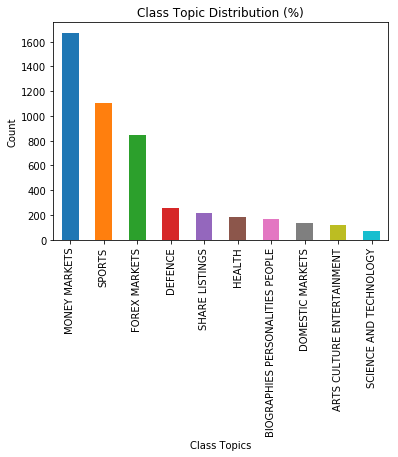

In [11]:
# Histogram of Count per Topic without IRRELEVANT articles
ax = rel_data["topic"].value_counts(normalize=False,dropna=False,sort=True).plot(kind='bar', title="Class Topic Distribution (%)")
ax.set_xlabel("Class Topics")
ax.set_ylabel("Count")

Text(0,0.5,'Relative Frequency')

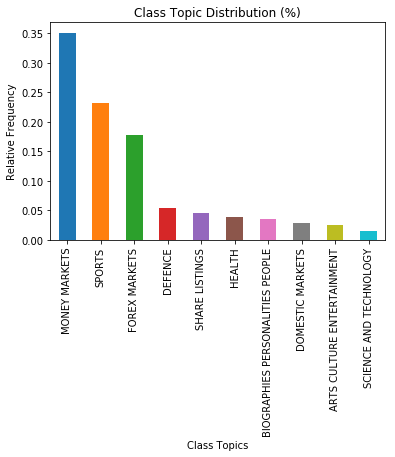

In [12]:
# Histogram of Topic Distribution without IRRELEVANT articles
# Relative Frequence per Topic
ax = rel_data["topic"].value_counts(normalize=True,dropna=False,sort=True).plot(kind='bar', title="Class Topic Distribution (%)")
ax.set_xlabel("Class Topics")
ax.set_ylabel("Relative Frequency")

# Article Length by Category

In [13]:
data['Article_length'] = data['article_words'].str.len()
#print("articles > 4000 words ")
#data[data['Article_length'] > 4000]

# Number of words = number of "," characters + 1
data['num_words'] = data['article_words'].str.count(",")+1

# Average Word Length per Article = (Article Length - Number of Commas) / Number of Words
data['avg_word_length'] = (data['Article_length']-data['num_words']-1) / (data['num_words'])
data.head()

,article_number,article_words,topic,topic_code,Article_length,num_words,avg_word_length
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",FOREX MARKETS,4,498,84,4.916667
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",MONEY MARKETS,6,348,61,4.688525
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",SPORTS,9,379,59,5.406780
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",FOREX MARKETS,4,415,67,5.179104
4,5,"morn,complet,weekend,minut,minut,minut,arrow,d...",IRRELEVANT,10,483,76,5.342105


In [49]:
max(data['num_words'])

1935

Text(0.5,1,'Article length distribution of all articles including')

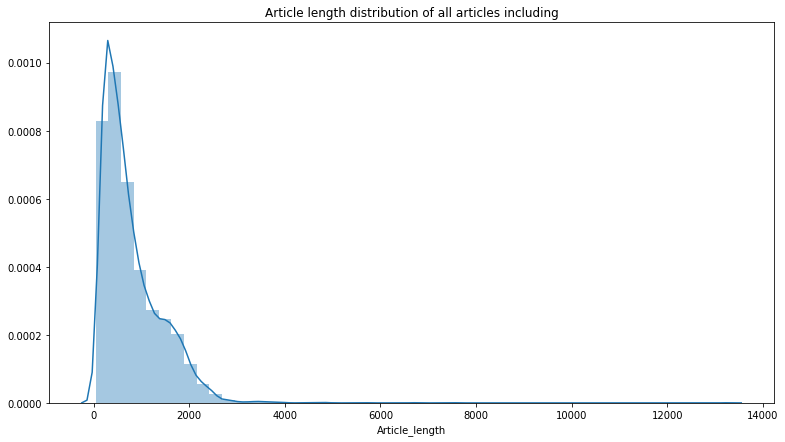

In [14]:
plt.figure(figsize=(13,7))
sns.distplot(data['Article_length']).set_title('Article length distribution of all articles including')

Text(0.5,1,'Average word length distribution of all articles')

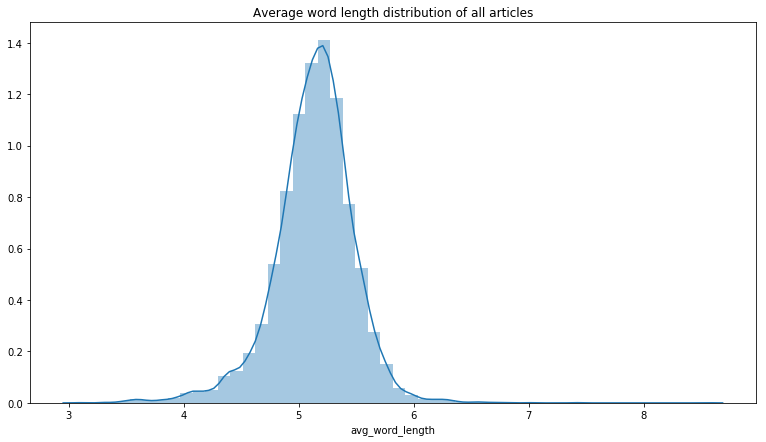

In [15]:
plt.figure(figsize=(13,7))
sns.distplot(data['avg_word_length']).set_title('Average word length distribution of all articles')

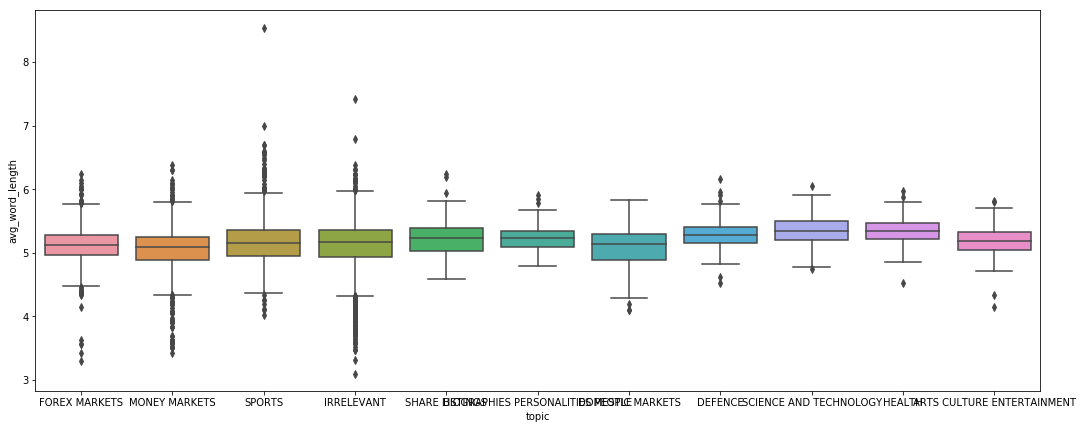

In [16]:
plt.figure(figsize=(18,7))
sns.boxplot(data=data, x='topic', y='avg_word_length')

In [17]:
quantile_95 = data['Article_length'].quantile(0.58)
data_95 = data[data['Article_length'] < quantile_95]
data_95.shape[0]

5510

Text(0.5,1,'Article length distribution of all articles (upto 95th quantile)')

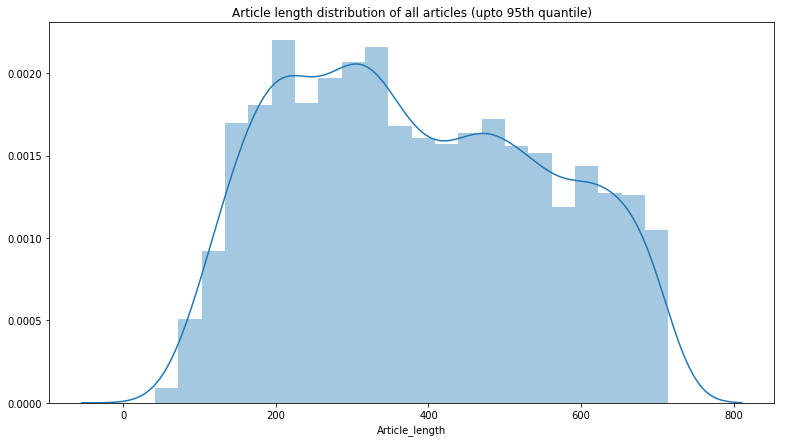

In [18]:
plt.figure(figsize=(13,7))
sns.distplot(data_95['Article_length']).set_title('Article length distribution of all articles (upto 95th quantile)')

In [19]:
rel_data['Article_length'] = rel_data['article_words'].str.len()

Text(0.5,1,'Article length distribution of RELEVANT articles')

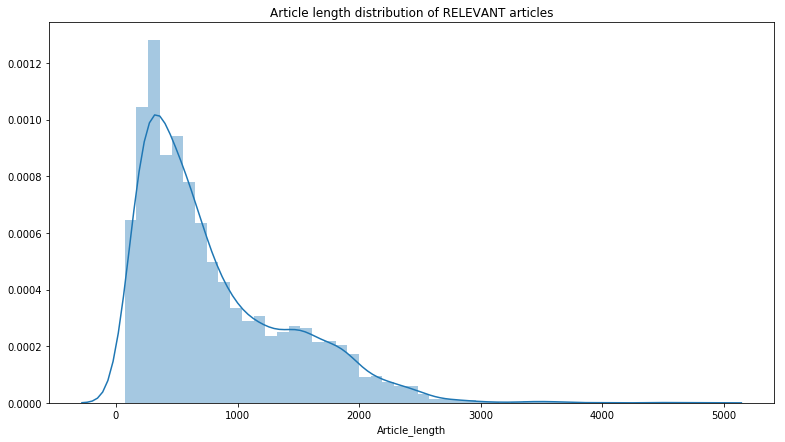

In [20]:
plt.figure(figsize=(13,7))
sns.distplot(rel_data['Article_length']).set_title('Article length distribution of RELEVANT articles')

In [21]:
rel_quantile_95 = rel_data['Article_length'].quantile(0.95)
rel_data_95 = rel_data[rel_data['Article_length'] < rel_quantile_95]

Text(0.5,1,'Article length distribution of RELEVANT articles')

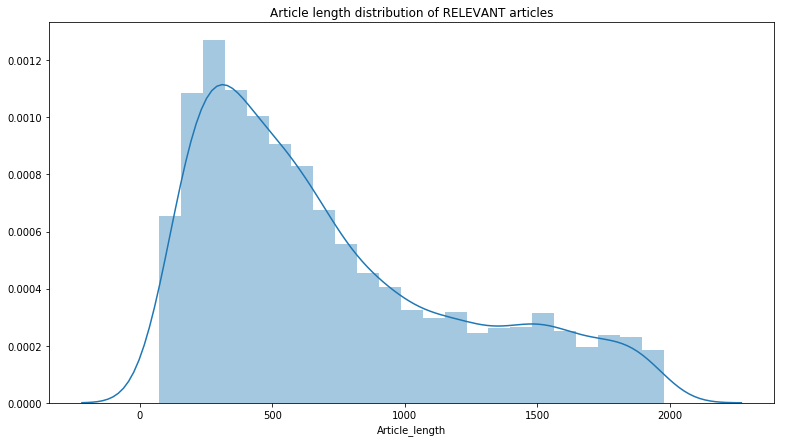

In [22]:
plt.figure(figsize=(13,7))
sns.distplot(rel_data_95['Article_length']).set_title('Article length distribution of RELEVANT articles')

Article Length is less skewed when we exclude IRRELEVANT articles

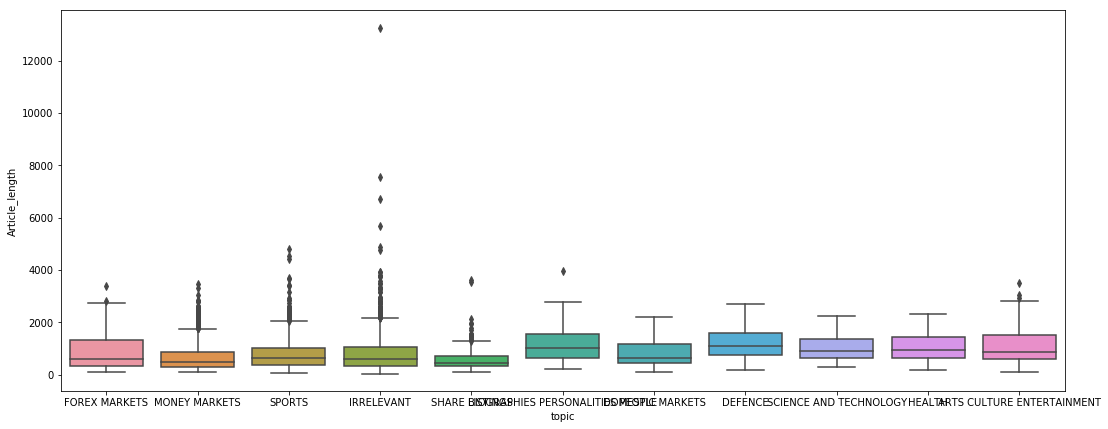

In [23]:
plt.figure(figsize=(18,7))
sns.boxplot(data=data, x='topic', y='Article_length')

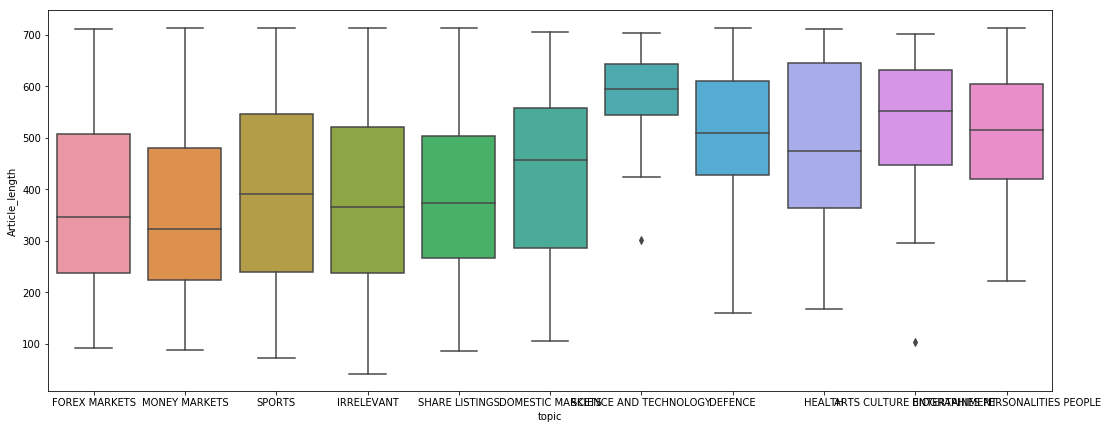

In [24]:
plt.figure(figsize=(18,7))
sns.boxplot(data=data_95, x='topic', y='Article_length')

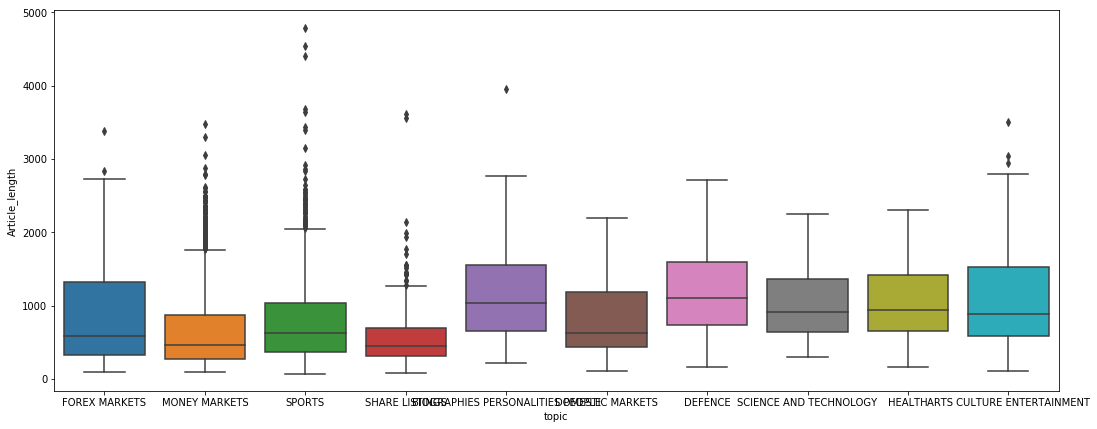

In [25]:
plt.figure(figsize=(18,7))
sns.boxplot(data=rel_data, x='topic', y='Article_length')

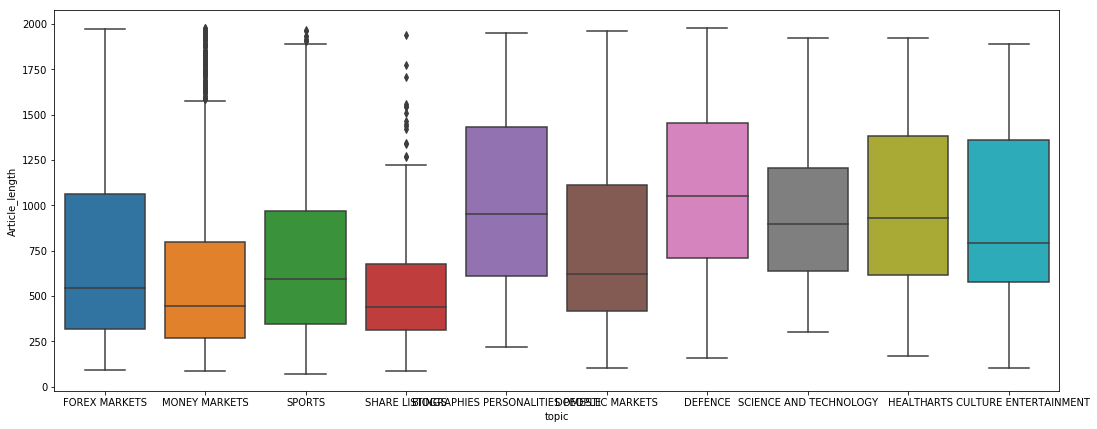

In [26]:
plt.figure(figsize=(18,7))
sns.boxplot(data=rel_data_95, x='topic', y='Article_length')

Distribution of Article Length looks pretty similar between all class topics.

# TF-IDF Feature Engineering

We will use at first only relevant topics

In [59]:
# Select Parameter values for TfidfVectorizer
ngram_range = (1,1)
# default: 1 (range[0,1]) -> ignore terms that have a lower document frequency
min_df = 10
# default: 1 (range[0,1]) -> ignore terms that have a higher document frequency
max_df = 1.
# default = None -> max number of words to be taken into account
# setting it to 250 to prevent to large vector-pickles files
max_features = None
# default = False -> apply sublinear transfer function
sublinear_tf = True
#
stop_words = None
#
lowercase = False

In [60]:
# Create custom tfidf function
tfidf = TfidfVectorizer(ngram_range=ngram_range,
                       min_df=min_df,
                       max_df=max_df,
                       max_features=max_features,
                       sublinear_tf=sublinear_tf,
                       stop_words=stop_words,
                       lowercase=lowercase,
                       norm='l2')

In [61]:
# Fit tfidf function to data
features = tfidf.fit_transform(rel_data["article_words"])

feature_names = tfidf.get_feature_names()

dense = features.todense()

denselist = dense.tolist()

df = pd.DataFrame(denselist, columns=feature_names)

#labels = rel_data["topic_code"]

#print(features.shape)
#print(labels.shape)

In [1]:
column_names = ["topic_code","word","tfidf"]
final_df = pd.DataFrame(columns = column_names)

num_docs = rel_data.shape[0]

for doc in range(num_docs):
    # Content
    #print(rel_data.iloc[doc]["article_words"])
    
    # Topic
    topic = rel_data.iloc[doc]["topic"]
    topic_code = rel_data.iloc[doc]["topic_code"]
   # print("Class = ", topic, "\n")

    # initialise empty list to store values for current doc
    value_list = []

    for feature in feature_names:
        # only store terms with tfidf value > 0
        if df.iloc[doc][feature] > 0:

            # append feature & tfidf value to list
            value_list.append([topic_code, feature, df.iloc[doc][feature]])

            # sort list in descending order by tfidf value
            value_list.sort(reverse = True, key = lambda x: x[2])
            
    # make list of lists into DataFrame
    temp_df = pd.DataFrame.from_records(value_list, columns = column_names)

    # append it to overall DataFrame
    final_df = final_df.append(temp_df, ignore_index = True)
            
    # print top 10 terms to get a feeling of whether terms are related to class
    '''if len(value_list) < 10:
        top_range = len(value_list)
    else:
        top_range = 10
    print("Top 10 terms for this article")
    for i in range(top_range):
        print(value_list[i])
    
    print("\n")
    print("Bottom 10 terms for this article")
    for i in range(1,top_range + 1):
        print(value_list[-i])
    print("\n")
    '''



'column_names = ["topic_code","word","tfidf"]\nfinal_df = pd.DataFrame(columns = column_names)\n\nnum_docs = rel_data.shape[0]\n\nfor doc in range(num_docs):\n    # Content\n    #print(rel_data.iloc[doc]["article_words"])\n    \n    # Topic\n    topic = rel_data.iloc[doc]["topic"]\n    topic_code = rel_data.iloc[doc]["topic_code"]\n   # print("Class = ", topic, "\n")\n\n    # initialise empty list to store values for current doc\n    value_list = []\n\n    for feature in feature_names:\n        # only store terms with tfidf value > 0\n        if df.iloc[doc][feature] > 0:\n\n            # append feature & tfidf value to list\n            value_list.append([topic_code, feature, df.iloc[doc][feature]])\n\n            # sort list in descending order by tfidf value\n            value_list.sort(reverse = True, key = lambda x: x[2])\n            \n    # make list of lists into DataFrame\n    temp_df = pd.DataFrame.from_records(value_list, columns = column_names)\n\n    # append it to overall

In [103]:
final_df.shape
final_df.head()

,topic_code,word,tfidf
0,4,won,0.272049
1,4,limit,0.210841
2,4,unwind,0.208465
3,4,dollar,0.206416
4,4,kim,0.204971


In [105]:
group_by = final_df.groupby(["topic_code","word"]).agg({'tfidf':['mean']})

In [106]:
group_by

tfidf
                           mean
topic_code word                
0          abandon     0.095264
           abc         0.113102
           abdullah    0.149433
           abroad      0.066984
           absolut     0.071374
           academ      0.147213
           accept      0.080767
           acclaim     0.117742
           accompan    0.075260
           account     0.052202
           accus       0.100484
           accusat     0.088763
           achief      0.109181
           acknowledg  0.108371
           acquir      0.256021
           act         0.121272
           action      0.062356
           activ       0.102436
           actress     0.144910
           actual      0.084044
           adam        0.079984
           add         0.055559
           address     0.069115
           admir       0.093636
           admit       0.112552
           adopt       0.052979
           adrian      0.086281
           adult       0.111773
           advanc      0.098020
           adventur    0.125920
...                         ...
9          worst       0.069836
           worth       0.065576
           wouldn      0.098001
           wound       0.222661
           wrap        0.089784
           wright      0.109672
           wrist       0.100312
           writ        0.107363
           wrong       0.099584
           xinhua      0.122068
           yankee      0.129654
           yard        0.096062
           year        0.054791
           yellow      0.147517
           yeltsin     0.132180
           yen         0.050544
           yesterday   0.074788
           yevgen      0.102875
           yield       0.041229
           york        0.078105
           young       0.093715
           youth       0.176028
           yugoslav    0.191918
           zagreb      0.229631
           zair        0.138500
           zaragoz     0.128649
           zealand     0.154566
           zimbabw     0.149962
           zone        0.135741
           zurich      0.077597

[19742 rows x 1 columns]